In [1]:
%reload_ext autoreload
%autoreload 2
import pynwb
import os

#DataJoint and DataJoint schema
import datajoint as dj
import numpy as np
import pandas as pd

## We also import a bunch of tables so that we can call them easily

from nwb_datajoint.common import (RawPosition, HeadDir, Speed, LinPos, StateScriptFile, VideoFile,
                                  DataAcquisitionDevice, CameraDevice, Probe,
                                  DIOEvents,
                                  ElectrodeGroup, Electrode, Raw, SampleCount,
                                  LFPSelection, LFP, LFPBandSelection, LFPBand,
                                  FirFilter,
                                  IntervalList,
                                  Lab, LabMember, LabTeam, Institution,
                                  BrainRegion,
                                  SensorData,
                                  Session, ExperimenterList,
                                  Subject,
                                  Task, TaskEpoch,
                                  Nwbfile, AnalysisNwbfile, NwbfileKachery, AnalysisNwbfileKachery,
                                  get_electrode_indices)
from nwb_datajoint.common.common_position import (PositionInfoParameters,IntervalPositionInfo)
from nwb_datajoint.common.common_interval import interval_list_intersect



from plot_lfp import (get_x_y_list, get_speed, get_timestamps_and_data,get_electrode_ids,remove_dead_tet_chans,check_for_dead_probes,
                      checking_other_dead_tets,simple_plot,plot_overlay,plot_overlay_with_pos,plot_speed_versus_theta, find_overlapping_times,get_x_y_timestamp_list)

import re
import matplotlib.pyplot as plt
import warnings
from ripple_detection.detectors import Kay_ripple_detector

warnings.simplefilter('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore', category=ResourceWarning)

Connecting emonroe@lmf-db.cin.ucsf.edu:3306


/home/emonroe/miniconda2/envs/nwb_datajoint/lib/python3.8/site-packages/position_tools/core.py:3: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [2]:
nwb_file_name = 'senor20201030_.nwb'

In [9]:
(IntervalPositionInfo() & {'nwb_file_name': nwb_file_name})#.fetch('interval_list_name')

*position_info *nwb_file_name *interval_list analysis_file_ head_position_ head_orientati head_velocity_
+------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+
default        senor20201030_ pos 0 valid ti senor20201030_ 73e174d5-bda7- df4a3575-0866- 19266551-3d64-
default        senor20201030_ pos 1 valid ti senor20201030_ 76fde618-43d7- c5f85e62-f20e- 8c1eaded-d6d9-
default        senor20201030_ pos 10 valid t senor20201030_ bac473f6-6706- 17149b6c-1476- 6432f1e0-f142-
default        senor20201030_ pos 11 valid t senor20201030_ 73537d9d-5460- 7cdf93ed-bd3c- 22fdbdea-8d96-
default        senor20201030_ pos 12 valid t senor20201030_ e919ad37-9d86- 951a38b1-2003- fa4910f6-e2fb-
default        senor20201030_ pos 13 valid t senor20201030_ dff94caf-ee0f- da51bf0a-868d- f590bf06-483d-
default        senor20201030_ pos 14 valid t senor20201030_ f1266106-ce1a- 9e0cc8cf-2955- e9c0885d-dbad-
default        senor20201030_ pos 2 valid ti senor20201030_ 30415254-d78a- 7e4a8864-6ab5- cdf0dbf0-021d-
default        senor20201030_ pos 3 valid ti senor20201030_ cf6b464d-f2e4- 682ec2c6-2f4b- 22502d15-fb80-
default        senor20201030_ pos 4 valid ti senor20201030_ 9c2143e3-065a- 580630f8-03f5- e3b77330-a58b-
default        senor20201030_ pos 5 valid ti senor20201030_ a23413ae-747b- ef7a2862-004d- f23d8123-61b1-
default        senor20201030_ pos 6 valid ti senor20201030_ 5012d4cd-abc7- 902331e1-55c3- 424252b2-b868-
   ...
 (Total: 45)

In [70]:
theta_timestamps, theta_data, theta_eseries = get_timestamps_and_data(nwb_file_name,filter_type=['Theta 5-11 Hz'],data_type = ['theta'])
lfp_timestamps, lfp_data, lfp_eseries = get_timestamps_and_data(nwb_file_name,data_type = ['lfp'])


position_info = (IntervalPositionInfo() &
                 {'nwb_file_name': nwb_file_name,
                  'interval_list_name': 'pos 1 valid times',
                  'position_info_param_name': 'default'}
                ).fetch1_dataframe()

In [71]:
electrode_id = [17,40,132,300]
time_from_start = 300 #in seconds
time_interval_s = 3
sampling_rate_lfp = 1000
epoch = (IntervalList & {'nwb_file_name':nwb_file_name} & {'interval_list_name':'02_r1'}).fetch1('valid_times')
x_elect_theta, y_elect_theta =get_x_y_list(time_from_start, time_interval_s,epoch, electrode_id, theta_eseries, theta_timestamps, theta_data)
x_speed,y_speed = get_speed(position_info,epoch,time_from_start,time_interval_s)

x_elect_lfp, y_elect_lfp = get_x_y_list(time_from_start, time_interval_s,epoch, electrode_id, lfp_eseries, lfp_timestamps, lfp_data)





In [ ]:
#want to start niteracting with position data here 

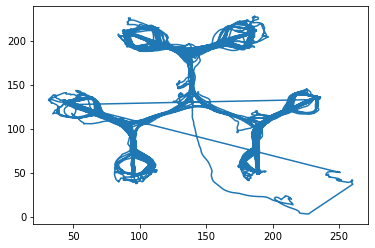

In [26]:
plt.plot(position_info.head_position_x, position_info.head_position_y)

# axes[0].set_xlabel('x-position [cm]', fontsize=18)
# axes[0].set_ylabel('y-position [cm]', fontsize=18)
# axes[0].set_title('Head Position', fontsize=28)

In [ ]:
#i need to find times when he is approaching the choice point. 
#could start by finding times when he is starting a trial (leaving one well, going to another). Or could try to find times when he is at a given position. 


In [10]:
#look at one trial, plot this on top of other position. 

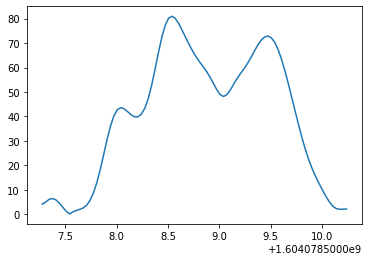

In [27]:
plt.plot(x_speed,y_speed)

In [15]:
position_info

head_position_x  head_position_y  head_orientation  \
time                                                               
1.604078e+09              NaN              NaN               NaN   
1.604078e+09              NaN              NaN               NaN   
1.604078e+09              NaN              NaN               NaN   
1.604078e+09              NaN              NaN               NaN   
1.604078e+09              NaN              NaN               NaN   
...                       ...              ...               ...   
1.604079e+09          96.2465          68.4265          1.892547   
1.604079e+09          96.1395          70.3525          1.783228   
1.604079e+09          96.1930          72.3320          1.723446   
1.604079e+09          96.3535          74.1510          1.699707   
1.604079e+09          96.0860          75.5420          1.717875   

              head_velocity_x  head_velocity_y  head_speed  
time                                                        
1.604078e+09              NaN              NaN         NaN  
1.604078e+09              NaN              NaN         NaN  
1.604078e+09              NaN              NaN         NaN  
1.604078e+09              NaN              NaN         NaN  
1.604078e+09              NaN              NaN         NaN  
...                       ...              ...         ...  
1.604079e+09       -18.510226        39.833951   43.924618  
1.604079e+09       -13.011806        39.301131   41.399107  
1.604079e+09        -8.684986        37.011240   38.016587  
1.604079e+09        -5.585493        32.840560   33.312162  
1.604079e+09        -3.529188        27.194563   27.422608  

[35951 rows x 6 columns]

In [16]:
def get_pos(position_info,epoch,time_from_start, time_interval_s):
    position_start_timestamp = (position_info.index>epoch[0][0] +time_from_start)
    position_end_timestamps = (position_info.index<epoch[0][0]+time_from_start + time_interval_s)
    position_time = position_info.index[position_start_timestamp & position_end_timestamps]
    position_x = position_info.head_position_x[position_start_timestamp & position_end_timestamps]
    position_y = position_info.head_position_y[position_start_timestamp & position_end_timestamps]
    return(position_time,position_x,position_y)

In [28]:
position_time, position_x,position_y = get_pos(position_info, epoch,time_from_start,time_interval_s)

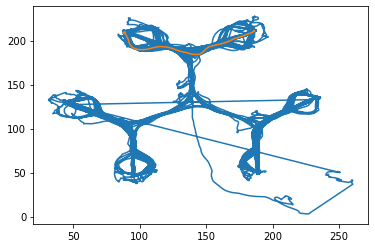

In [29]:
plt.plot(position_info.head_position_x, position_info.head_position_y)
plt.plot(position_x,position_y)


In [ ]:
#nice, so i got the indexing/filtering by times working, but not i want to do the oppisite. find the times when he is at a certain position. 


In [31]:
from spectral_connectivity import Multitaper
from spectral_connectivity import Connectivity
from spectral_connectivity import multitaper_connectivity

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


frequency resolution: 3.3333333333333335


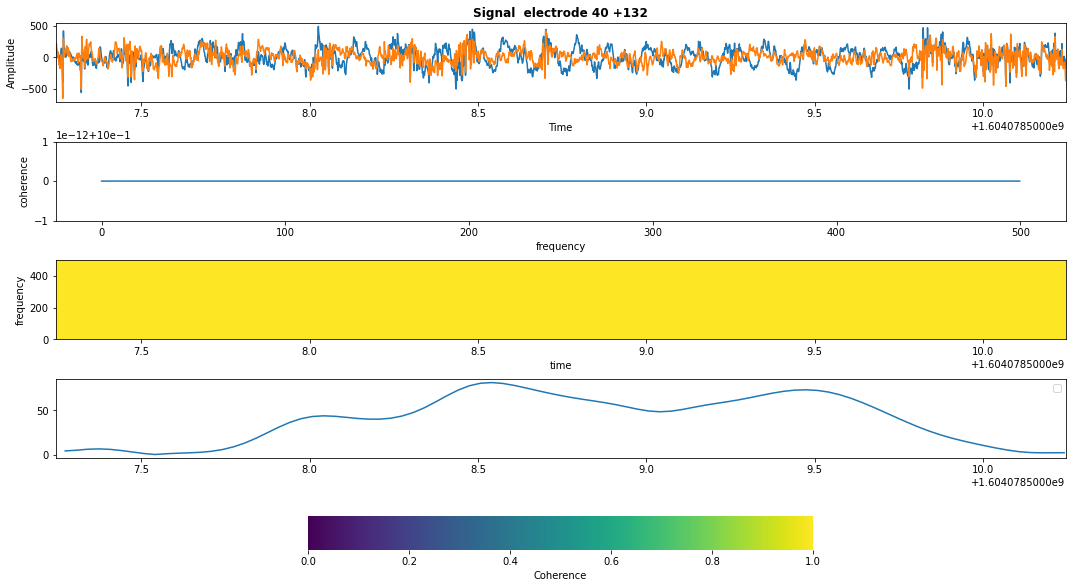

In [145]:
time_halfbandwidth_product = 1
sampling_frequency = 1000

electrode_ix1= 1
electrode_ix2= 2


time_data = x_elect_lfp[electrode_ix1]
sampling_frequency = 1000

signal = np.zeros((len(time_data), 2))
signal[:,0] = y_elect_lfp[electrode_ix1]
signal[:,1]=y_elect_lfp[electrode_ix2]


fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 9))
axes[0].set_title(f'Signal  electrode {electrode_id[electrode_ix1]} +{electrode_id[electrode_ix2]}', fontweight='bold')
axes[0].plot(time_data, signal[:, 0], label='Signal1')
axes[0].plot(time_data, signal[:, 1], label='Signal2')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Amplitude')

axes[0].set_xlim(time_data[0], time_data[-1])
# axes[0].set_ylim((-2, 2))
plt.legend()


m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               # time_window_duration=0.4,
               start_time=time_data[0])

c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies)
axes[1].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axes[1].set_ylabel('coherence')
axes[1].set_xlabel('frequency')
# axes[1].set_xlim(time[0], time[-1])




m = Multitaper(signal,
               sampling_frequency=sampling_frequency,
               time_halfbandwidth_product=time_halfbandwidth_product,
               time_window_duration=.6,
               time_window_step=None,
               start_time=time_data[0])
c = Connectivity(fourier_coefficients=m.fft(),
                 frequencies=m.frequencies,
                 time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_data[-1]),
    np.append(c.frequencies, m.nyquist_frequency))

mesh = axes[2].pcolormesh(time_grid,freq_grid , c.coherence_magnitude()[..., 0, 1].squeeze().T,
                             vmin=0.0, vmax=1.0, cmap='viridis')
axes[2].set_ylabel('frequency')
axes[2].set_xlabel('time')
# axes[2].set_ylim(0,100)
axes[2].set_xlim(time_data[0], time_data[-1])
axes[2].set_ylim(0,500)


axes[3].plot(x_pos,y_pos)
axes[3].set_xlim(time_data[0], time_data[-1])



plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Coherence')
cb.outline.set_linewidth(0)
print('frequency resolution: {}'.format(m.frequency_resolution))


#go back to the papers.. what values were they seeing? 
#go back to priority list 
#jot some notes down about the power spectra.. take note of what observations i see 

#what have a looked at, what do i need to answer my questions 


#should theta be higher in cell layer or at ref? 

In [125]:
2*.6

1.2

(5,) (5, 5)


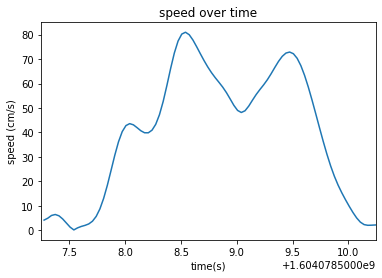

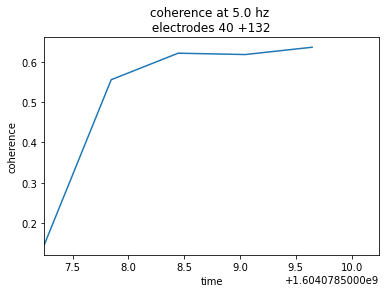

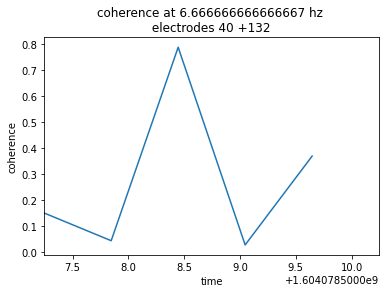

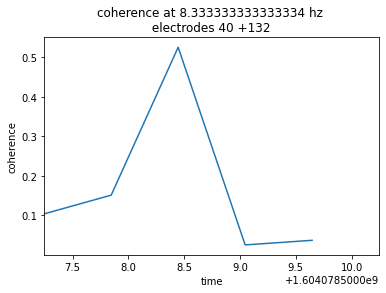

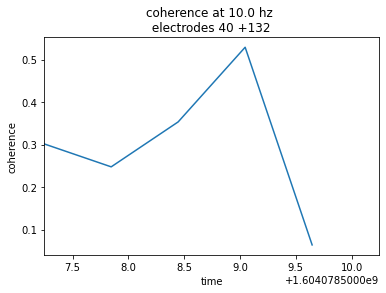

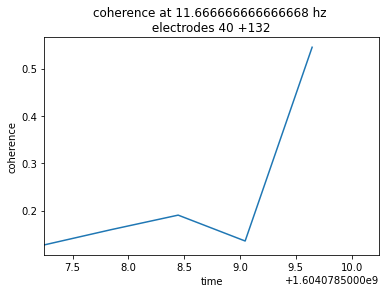

In [39]:
freq_seg = c.frequencies[(c.frequencies >= 5) & (c.frequencies <=12)]
coh_seg = c.coherence_magnitude()[..., 0, 1].squeeze().T[(c.frequencies >= 5) & (c.frequencies <=12)]
print(freq_seg.shape, coh_seg.shape)
plt.figure()
plt.plot(x_pos,y_pos)
plt.xlabel('time(s)')
plt.ylabel('speed (cm/s)')
plt.title('speed over time')
plt.xlim(time_data[0], time_data[-1])




for ix in range(len(coh_seg)):
    plt.figure()
    plt.plot(c.time,coh_seg[ix])
    plt.title(f'coherence at {freq_seg[ix]} hz \n electrodes {electrode_id[electrode_ix1]} +{electrode_id[electrode_ix2]} ')
    plt.xlabel('time')
    plt.ylabel('coherence')
    plt.xlim(time_data[0], time_data[-1])



In [37]:
freq_seg
coh_seg

array([[0.14650501, 0.55536736, 0.62102547, 0.61768917, 0.63574702],
       [0.15121891, 0.04491703, 0.787817  , 0.02876095, 0.36988485],
       [0.10389335, 0.15119157, 0.52545342, 0.02527499, 0.03693632],
       [0.30142628, 0.24744051, 0.3532065 , 0.52887034, 0.0637495 ],
       [0.12732119, 0.15957552, 0.19026159, 0.13558388, 0.54498165]])

Text(0.5, 1.0, 'coherence in bands between 5 and 12 hz over time')

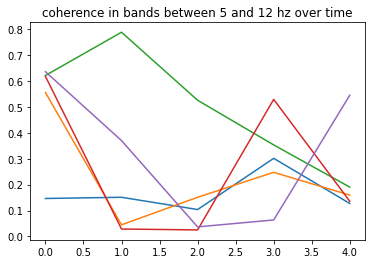

In [41]:
plt.plot(coh_seg)

plt.title('coherence in bands between 5 and 12 hz over time')

In [96]:
len(coh_seg[0])

5

In [68]:
df = pd.DataFrame(time_data)
df['x_pos'] = (position_x.tolist())
df['y_pos']= (position_y.tolist())

ValueError: Length of values (90) does not match length of index (3000)

In [69]:
len(time_data)

3000

In [61]:
type(position_y)

pandas.core.series.Series

In [72]:
len(position_y.tolist())

90

33.333333333333336

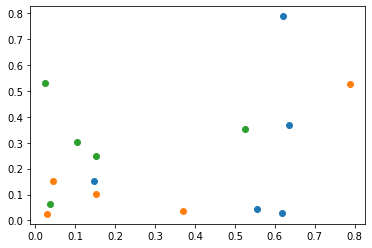

In [78]:
coh_avg_band = np.mean(coh_seg, axis=0)

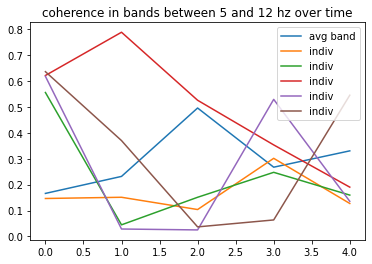

In [81]:
plt.plot(coh_avg_band, label='avg band')
plt.plot(coh_seg, label= 'indiv')
plt.title('coherence in bands between 5 and 12 hz over time')
plt.legend()

In [82]:
# i think i will need to have a coherence for every position. 
#or at least a position for every coherence. 
#lets get the times of each coherence value. 
#then add the position data for just those times. 


In [84]:
len(c.time)

7

In [85]:
len(coh_seg)

5

ValueError: x and y can be no greater than 2D, but have shapes (7,) and (7, 200, 2, 2)

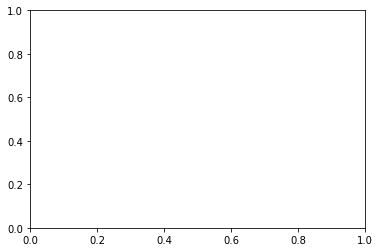

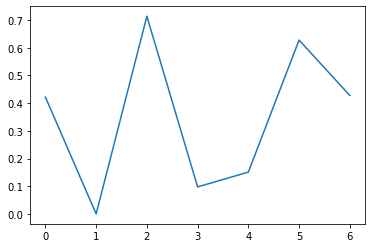

In [91]:
plt.plot((c.coherence_magnitude()[..., 0, 1].squeeze().T[0]))


In [93]:
c.coherence_magnitude()[..., 0, 1].squeeze().T

(200, 7)

In [97]:
range(len((c.coherence_magnitude()[..., 0, 1].squeeze().T)))

range(0, 200)

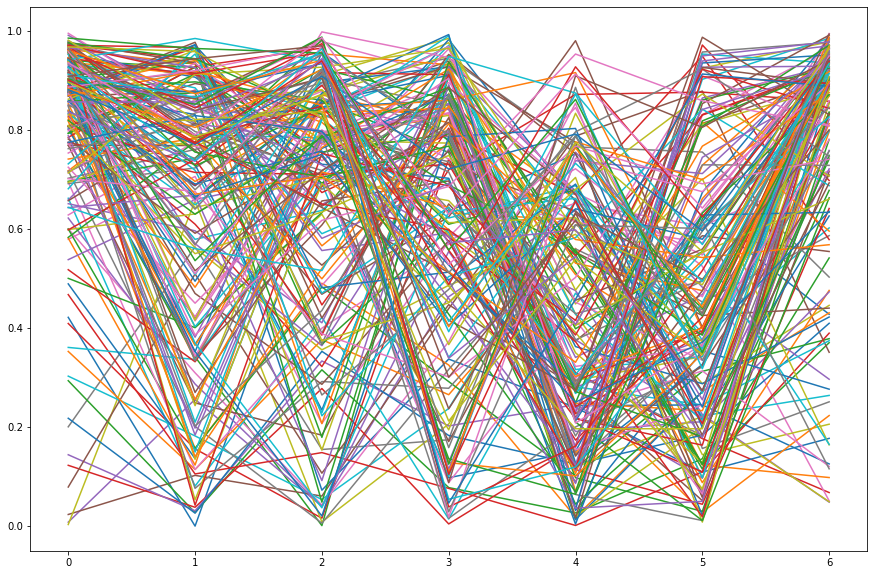

In [102]:
plt.figure(figsize=(15,10))
for ix in range(len((c.coherence_magnitude()[..., 0, 1].squeeze().T))):
    # plt.figure()
    plt.plot(c.coherence_magnitude()[..., 0, 1].squeeze().T[ix])

In [103]:
c.time

array([1.60407851e+09, 1.60407851e+09, 1.60407851e+09, 1.60407851e+09,
       1.60407851e+09, 1.60407851e+09, 1.60407851e+09])

In [104]:
coh = pd.DataFrame(c.time)
coh

0
0  1.604079e+09
1  1.604079e+09
2  1.604079e+09
3  1.604079e+09
4  1.604079e+09
5  1.604079e+09
6  1.604079e+09

In [107]:
coh['coh'] = c.coherence_magnitude()[..., 0, 1].squeeze().T[0]

0       coh
0  1.604079e+09  0.421774
1  1.604079e+09  0.000652
2  1.604079e+09  0.713355
3  1.604079e+09  0.098076
4  1.604079e+09  0.151294
5  1.604079e+09  0.627439
6  1.604079e+09  0.427889

In [109]:
position_time == coh.iloc[0]

Float64Index([ 1604078507.274421, 1604078507.3077457, 1604078507.3410707,
              1604078507.3744166, 1604078507.4077415, 1604078507.4410875,
              1604078507.4744122, 1604078507.5077372,  1604078507.541083,
              1604078507.5744076,  1604078507.607754, 1604078507.6410787,
              1604078507.6744037, 1604078507.7077494,  1604078507.741074,
               1604078507.774399,  1604078507.807745,   1604078507.84107,
               1604078507.874416, 1604078507.9077406, 1604078507.9410658,
              1604078507.9744115, 1604078508.0077362, 1604078508.0410826,
               1604078508.074407,  1604078508.107732,  1604078508.141078,
              1604078508.1744027, 1604078508.2077277, 1604078508.2410736,
              1604078508.2743986, 1604078508.3077445, 1604078508.3410707,
              1604078508.3743954, 1604078508.4077415, 1604078508.4410663,
              1604078508.4744122, 1604078508.5077372, 1604078508.5410619,
               1604078508.574408, 1604

In [115]:
coh.iloc[1,0]

1604078507.6462812

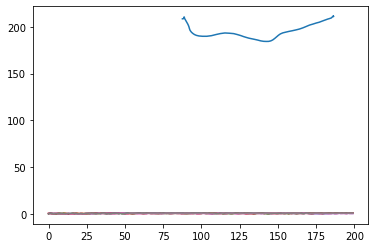

In [118]:
plt.plot(position_x,position_y,c.coherence_magnitude()[..., 0, 1].squeeze().T)